In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [80]:
imagePaths = 'DATASET/'
label_list = ['daun kemangi', 'daun pepaya']
data = []
labels = []

In [81]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'/*.jpg'):
    #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

In [82]:
np.array(data).shape

(4, 32, 32, 3)

In [83]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [84]:
print(labels)

['daun kemangi' 'daun kemangi' 'daun kemangi' 'daun kemangi']


In [85]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[0 0 0 0]


In [86]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [87]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (3, 32, 32, 3)
Ukuran data test = (1, 32, 32, 3)


In [88]:
model = Sequential()
# Extracted Feature Layer
model.add(InputLayer(input_shape=[32,32,3]))
model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=50, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
# Fully Connected Layer\n",
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [89]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        416       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 50)        6450      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 50)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 50)          0         
                                                                 
 flatten_2 (Flatten)         (None, 3200)             

In [90]:
# tentukan hyperparameter
lr = 0.001
max_epochs = 100
opt_funct = Adam(learning_rate=lr)

In [91]:
# compile arsitektur yang telah dibuat
model.compile(loss = 'binary_crossentropy',
              optimizer = opt_funct, 
              metrics = ['accuracy'])

In [92]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
            epochs=max_epochs, batch_size=32)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.6984 - accuracy: 0.6667 - val_loss: 0.1007 - val_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 55ms/step - loss: 0.1341 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 63ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 51ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.2038e-04 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 54ms/step - loss: 4.4372e-04 - accuracy: 1.0000 - val_loss: 1.4447e-05 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 52ms/step - loss: 1.2845e-05 - accuracy: 1.0000 - val_loss: 1.9432e-06 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 63ms/step - loss: 1.4982e-06 - accuracy: 1.0000 - val_loss: 2.9498e-07 - val_accuracy: 1

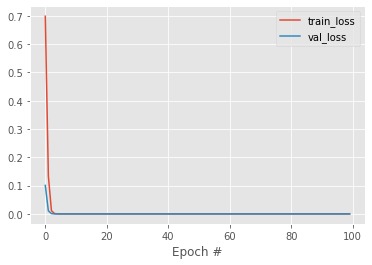

In [93]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
#plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

In [100]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(y_test, target, target_names=label_list))

ValueError: ignored

In [101]:
# uji model menggunakan image lain
queryPath = imagePaths+'045.jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0
q_pred = model.predict(q)
print(q_pred)

AttributeError: ignored

In [102]:
if q_pred<=0.5 :
    target = "daun kemangi"
else :
    target = "daun pepaya"
text = "{}".format(target)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
# menampilkan output image
cv2_imshow(output)

NameError: ignored